In [36]:
%pip install scikit-learn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v3 import preprocess_input 
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler  # Fix import statement
# to prevent unnecessary warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# TensorFlow and tf.keras
import tensorflow as tf

from pathlib import Path

#import useful module for keras library
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

# get modules from sklearn library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pandas as pd

In [38]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('metadata - standardized.csv')

In [39]:
data.columns

Index(['names', 'types', 'type_expanded', 'isColor', 'original_name',
       'patient_id', 'fundus', 'fundus_od_seg', 'fundus_oc_seg', 'bv_seg',
       'artery_seg', 'vein_seg', 'oct', 'oct_oc_seg', 'oct_od_seg', 'sex',
       'gender', 'age', 'eye', 'sbp', 'dbp', 'hr', 'iop', 'vcdr',
       'Unnamed: 24', 'notchI_present', 'notchS_present', 'notchN_present',
       'notchT_present', 'expert1_grade', 'expert2_grade', 'expert3_grade',
       'expert4_grade', 'expert5_grade', 'cdr_avg', 'cdr_expert1',
       'cdr_expert2', 'cdr_expert3', 'cdr_expert4', 'refractive_dioptre_1',
       'refractive_dioptre_2', 'refractive_astigmatism',
       'phakic_or_pseudophakic', 'iop_perkins', 'iop_pneumatic', 'pachymetry',
       'axial_length', 'visual_field_mean_defect'],
      dtype='object')

In [40]:
data.head()

,names,types,type_expanded,isColor,original_name,patient_id,fundus,fundus_od_seg,fundus_oc_seg,bv_seg,...,cdr_expert4,refractive_dioptre_1,refractive_dioptre_2,refractive_astigmatism,phakic_or_pseudophakic,iop_perkins,iop_pneumatic,pachymetry,axial_length,visual_field_mean_defect
0,OIA-ODIR-TEST-OFFLINE-1,0,NaN,1,1029_right.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-1.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OIA-ODIR-TEST-OFFLINE-2,0,NaN,1,1049_left.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-2.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OIA-ODIR-TEST-OFFLINE-4,0,NaN,1,1128_left.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-4.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OIA-ODIR-TEST-OFFLINE-5,0,NaN,1,1179_right.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-5.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OIA-ODIR-TEST-OFFLINE-6,0,NaN,1,1180_left.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-6.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
data['types'].value_counts()

types
 0    7549
 1    4767
-1     133
Name: count, dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   names                     12449 non-null  object 
 1   types                     12449 non-null  int64  
 2   type_expanded             6577 non-null   object 
 3   isColor                   12449 non-null  int64  
 4   original_name             12449 non-null  object 
 5   patient_id                488 non-null    object 
 6   fundus                    12449 non-null  object 
 7   fundus_od_seg             3103 non-null   object 
 8   fundus_oc_seg             3103 non-null   object 
 9   bv_seg                    462 non-null    object 
 10  artery_seg                22 non-null     object 
 11  vein_seg                  22 non-null     object 
 12  oct                       79 non-null     object 
 13  oct_oc_seg                45 non-null     object 
 14  oct_od

In [43]:
data['fundus_od_seg'].value_counts()

fundus_od_seg
/optic-disc/ORIGA-1.png              1
/optic-disc/G1020-442.png            1
/optic-disc/G1020-468.png            1
/optic-disc/G1020-469.png            1
/optic-disc/G1020-470.png            1
                                    ..
/optic-disc/REFUGE1-train-388.png    1
/optic-disc/REFUGE1-train-389.png    1
/optic-disc/REFUGE1-train-390.png    1
/optic-disc/REFUGE1-train-391.png    1
/optic-disc/PAPILA-488.png           1
Name: count, Length: 3103, dtype: int64

In [44]:
data['fundus'].value_counts()

fundus
/full-fundus/OIA-ODIR-TEST-OFFLINE-1.png    1
/full-fundus/EyePACS-Glaucoma-24.png        1
/full-fundus/EyePACS-Glaucoma-2.png         1
/full-fundus/EyePACS-Glaucoma-3.png         1
/full-fundus/EyePACS-Glaucoma-4.png         1
                                           ..
/full-fundus/OIA-ODIR-TRAIN-2904.png        1
/full-fundus/OIA-ODIR-TRAIN-2905.png        1
/full-fundus/OIA-ODIR-TRAIN-2906.png        1
/full-fundus/OIA-ODIR-TRAIN-2907.png        1
/full-fundus/FIVES-400.png                  1
Name: count, Length: 12449, dtype: int64

optic-disc/optic-disc/G1020-619.png


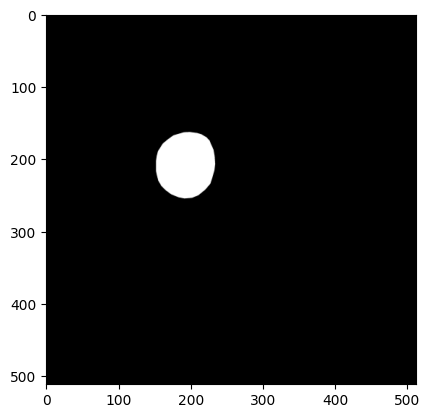

In [45]:
def viewOpticDisk(image_path):

    image_path = 'optic-disc' + image_path

    print(image_path)

    # Load the image
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB color space
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image_rgb)
    plt.axis('on')  # Hide the axis to only show the image
    plt.show()

viewOpticDisk(data['fundus_od_seg'][7890])

In [46]:
#removing the patients with no fundus classification and with fundus classification -1 instead of 0,1
fundus_subset = data[(data['fundus_od_seg'].notnull()) & (data['types'] != -1)]

fundus_subset = fundus_subset[['types', 'fundus_od_seg', 'names']]

fundus_subset['combined'] = fundus_subset['names'] + '.png'

fundus_subset['fundus_od_seg'] = fundus_subset['fundus_od_seg'].astype(str)

fundus_subset['types'] = fundus_subset['types'].astype(str)

fundus_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3035 entries, 4546 to 12048
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   types          3035 non-null   object
 1   fundus_od_seg  3035 non-null   object
 2   names          3035 non-null   object
 3   combined       3035 non-null   object
dtypes: object(4)
memory usage: 118.6+ KB


In [47]:
fundus_subset['types'].value_counts()

types
0    2310
1     725
Name: count, dtype: int64

In [48]:
fundus_subset

,types,fundus_od_seg,names,combined
4546,0,/optic-disc/ORIGA-1.png,ORIGA-1,ORIGA-1.png
4547,0,/optic-disc/ORIGA-2.png,ORIGA-2,ORIGA-2.png
4548,0,/optic-disc/ORIGA-3.png,ORIGA-3,ORIGA-3.png
4549,0,/optic-disc/ORIGA-4.png,ORIGA-4,ORIGA-4.png
4550,0,/optic-disc/ORIGA-5.png,ORIGA-5,ORIGA-5.png
...,...,...,...,...
12044,0,/optic-disc/PAPILA-484.png,PAPILA-484,PAPILA-484.png
12045,0,/optic-disc/PAPILA-485.png,PAPILA-485,PAPILA-485.png
12046,0,/optic-disc/PAPILA-486.png,PAPILA-486,PAPILA-486.png
12047,0,/optic-disc/PAPILA-487.png,PAPILA-487,PAPILA-487.png


In [49]:
# glaucoma fundus images
glaucomaCount = len(fundus_subset[(fundus_subset['types'] == '1')])
print("this is the glaucoma count", glaucomaCount)

# healthy fundus images
healthyCount = len(fundus_subset[(fundus_subset['types'] == '0')])
print("this is the healthy eyes count", healthyCount)

print('\nTotal fundus images to  be used: ', glaucomaCount + healthyCount)

# randomize data
fundus_subset_random = fundus_subset.sample(frac=1, random_state=1)

# create df for each class based on randomized data
healthy_subset = fundus_subset_random[fundus_subset_random['types'] == '0']
glaucoma_subset = fundus_subset_random[fundus_subset_random['types'] == '1']

testSize = 500
valSize = 500

# get train items
healthy_train = healthy_subset.head(healthyCount - testSize)
glaucoma_train = glaucoma_subset.head(glaucomaCount - testSize)
train = healthy_train._append(glaucoma_train)

# get val items
healthy_val = healthy_subset.tail(valSize)
glaucoma_val = glaucoma_subset.tail(valSize)
val = healthy_val._append(glaucoma_val)

# get test items
healthy_test = healthy_subset.tail(testSize)
glaucoma_test = glaucoma_subset.tail(testSize)
test = healthy_test._append(glaucoma_test)

this is the glaucoma count 725
this is the healthy eyes count 2310

Total fundus images to  be used:  3035


In [50]:
print("Train Size: ", len(train))
print("Test Size: ", len(test))

Train Size:  2035
Test Size:  1000


In [51]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [55]:
import tensorflow as tf
from tensorflow import keras
from keras.layers.experimental.preprocessing import Rescaling
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v3 import preprocess_input 


# Set target size and batch size for data generator
target = 224
batchSize = 8

# Set the class mode to 'binary' for training data generator
classes = 'binary'

with tf.device('/GPU:0'):


    # Create the training data generator
    trainDataGen = ImageDataGenerator(preprocessing_function=preprocess_input)
    trainGen = trainDataGen.flow_from_dataframe(dataframe=train, 
                                                directory='optic-disc/optic-disc/', 
                                                class_mode = classes,
                                                batch_size = batchSize, 
                                                shuffle=True, 
                                                x_col="combined", 
                                                y_col="types", 
                                                validate_filenames=True, 
                                                target_size=(target, target), 
                                                color_mode='rgb')


    # Create the validation data generator
    valDataGen = ImageDataGenerator(preprocessing_function=preprocess_input)
    valGen = valDataGen.flow_from_dataframe(dataframe=val,
                                            directory='optic-disc/optic-disc/',   
                                            batch_size = batchSize, 
                                            class_mode = classes,
                                            shuffle=False, 
                                            x_col="combined", 
                                            y_col="types", 
                                            validate_filenames=True, 
                                            target_size=(target, target), 
                                            color_mode='rgb')


    # Create the testing data generator
    testDataGen = ImageDataGenerator(preprocessing_function=preprocess_input)
    testGen = testDataGen.flow_from_dataframe(dataframe=test,
                                            directory='optic-disc/optic-disc/',   
                                            batch_size = batchSize, 
                                            class_mode = classes,
                                            shuffle=False, 
                                            x_col="combined", 
                                            y_col="types", 
                                            validate_filenames=True, 
                                            target_size=(target, target), 
                                            color_mode='rgb')

Found 2035 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


MODEL 1: Basic Glaucoma Detection using a support vector machine (SVM) classifier on the OPTIC DISK CUP pictures. The features were extracted using the MobileNetV3 model.

In [56]:
from keras.applications import MobileNetV3Small
from keras import Sequential

# Load pre-trained MobileNetV3 model
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(target, target, 3))

model = Sequential([
    base_model, layers.GlobalAveragePooling2D()
])

# Function to extract features using this model
def extract_features(generator, sample_count):
    features = np.zeros(shape=(sample_count, model.layers[-1].output.shape[1]))
    labels = np.zeros(shape=(sample_count))
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = model.predict(inputs_batch)
        features[i * batchSize: (i + 1) * batchSize] = features_batch
        labels[i * batchSize: (i + 1) * batchSize] = labels_batch
        i += 1
        if i * batchSize >= sample_count:
            break
    return features, labels

In [57]:
import numpy as np

train_features, train_labels = extract_features(trainGen, trainGen.samples)
val_features, val_labels = extract_features(valGen, valGen.samples)
test_features, test_labels = extract_features(testGen, testGen.samples)

1/1 [==============================] - 0s 25ms/step


In [58]:
from sklearn.svm import SVC

with tf.device('/GPU:0'):

    # Create and train the SVM
    svm_model = SVC(kernel='linear')
    svm_model.fit(train_features, train_labels)

In [59]:
# Validate the SVM
val_accuracy = svm_model.score(val_features, val_labels)
print('Validation accuracy:', val_accuracy)

# Test the SVM
test_accuracy = svm_model.score(test_features, test_labels)
print('Test accuracy:', test_accuracy)

Validation accuracy: 0.5
Test accuracy: 0.5


In [60]:
from sklearn.metrics import confusion_matrix, classification_report

test_predictions = svm_model.predict(test_features)

conf_matrix = confusion_matrix(test_labels, test_predictions)
class_report = classification_report(test_labels, test_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[500   0]
 [500   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       500
         1.0       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



/root/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
with tf.device('/GPU:0'):

    # Set class mode to 'sparse' for visualization data generators
    classes = 'sparse'

    # Create data generators for healthy and glaucoma subsets for visualization
    healthy_subsetDataGen = ImageDataGenerator(preprocessing_function=preprocess_input)
    healthy_subset_Gen = trainDataGen.flow_from_dataframe(dataframe=healthy_subset, 
                                                directory='optic-disc/optic-disc/', 
                                                class_mode = classes,
                                                batch_size = batchSize, 
                                                shuffle=True, 
                                                x_col="combined", 
                                                y_col="types", 
                                                validate_filenames=True, 
                                                target_size=(target, target), 
                                                color_mode='rgb')


    glaucoma_subsetDataGen = ImageDataGenerator(preprocessing_function=preprocess_input)
    glaucoma_subset_Gen = glaucoma_subsetDataGen.flow_from_dataframe(dataframe=glaucoma_subset, 
                                                directory='optic-disc/optic-disc/', 
                                                class_mode = classes,
                                                batch_size = batchSize, 
                                                shuffle=True, 
                                                x_col="combined", 
                                                y_col="types", 
                                                validate_filenames=True, 
                                                target_size=(target, target), 
                                                color_mode='rgb')

Found 2310 validated image filenames belonging to 1 classes.
Found 725 validated image filenames belonging to 1 classes.


In [63]:
def show_images(gen):
    
    # return classes , images to be displayed
    g_dict = gen.class_indices        # defines dictionary {'class': index}
    classes = list(g_dict.keys())     # defines list of dictionary's kays (classes), classes names : string
    images, labels = next(gen)        # get a batch size samples from the generator

    # calculate number of displayed samples
    length = len(labels)        # length of batch size
    sample = min(length, 25)    # check if sample less than 25 images

    plt.figure(figsize= (20, 20))

    for i in range(sample):
        plt.subplot(4, 4, i + 1)
        image = images[i] / 255       # scales data to range (0 - 255)
        plt.imshow(image)
        index = np.argmax(labels[i])  # get image index
        class_name = classes[index]   # get class of image
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()

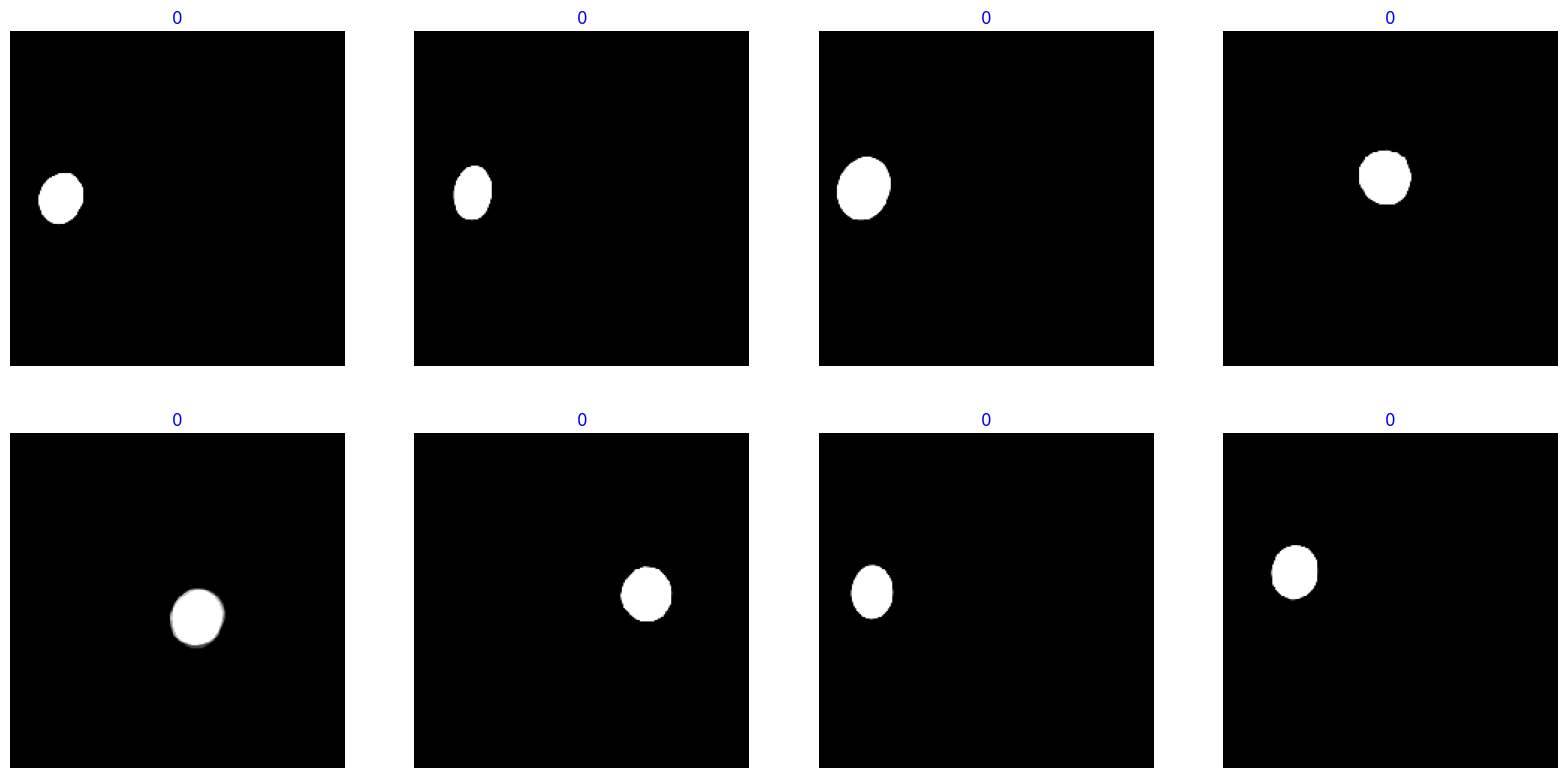

In [64]:
show_images(healthy_subset_Gen)

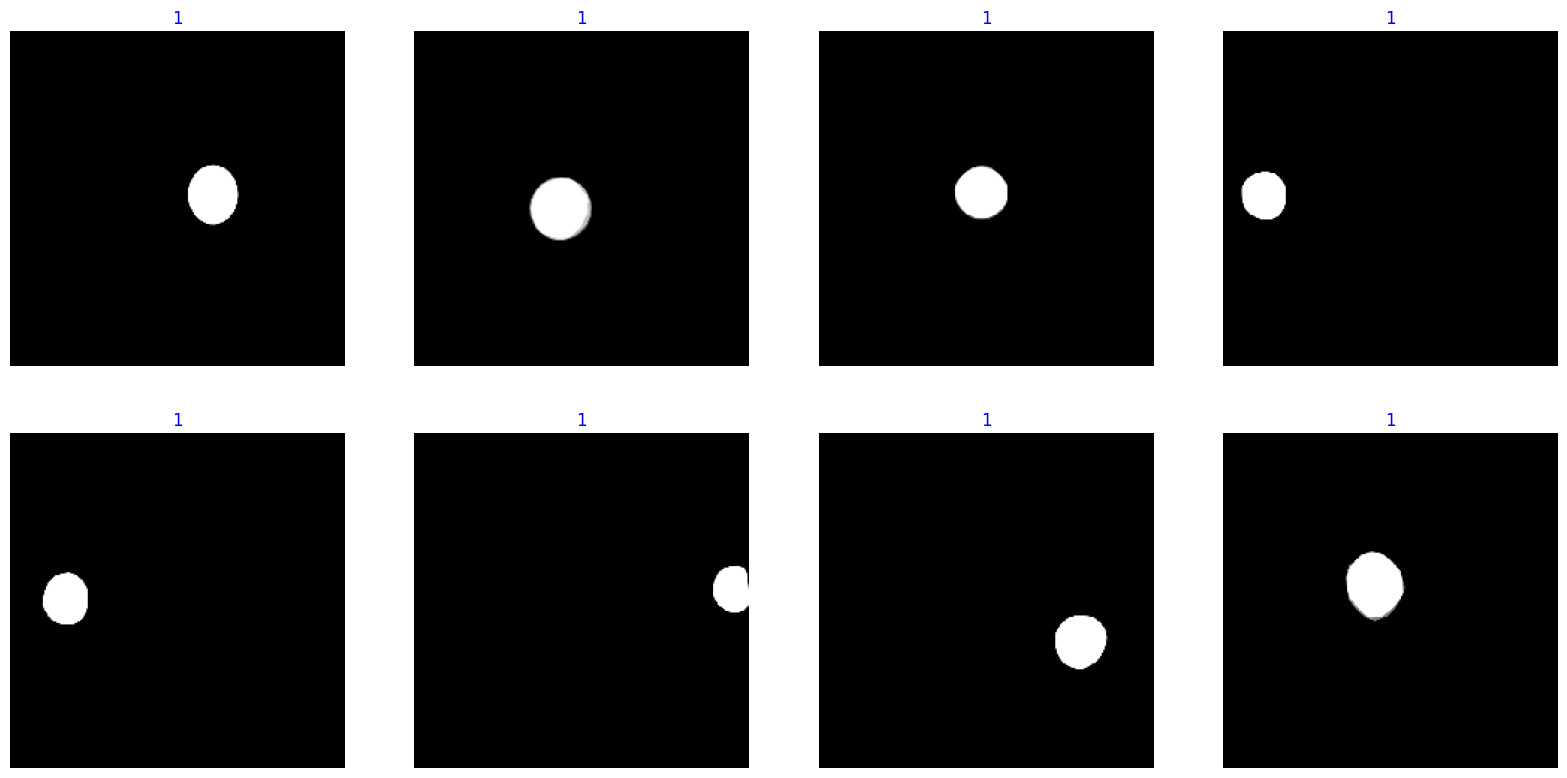

In [65]:
show_images(glaucoma_subset_Gen)

In [ ]:
# # Plot the training and validation accuracy and loss
# import seaborn as sns
# sns.set()

# acc = r.history['accuracy']
# val_acc = r.history['val_accuracy']
# loss = r.history['loss']
# val_loss = r.history['val_loss']
# epochs = range(1, len(loss) + 1)

# #accuracy plot
# plt.plot(epochs, acc, color='green', label='Training Accuracy')
# plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend()

# plt.figure()
# #loss plot
# plt.plot(epochs, loss, color='green', label='Training Loss')
# plt.plot(epochs, val_loss, color='red', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()